In [ ]:
import pandas as pd

In [ ]:
timeseries = pd.read_csv('Assignment 1 - Time Series Plots.csv')

In [ ]:
timeseries.head()

,Stage Completion Time,INSTALLATION sum Time taken to complete stage (in days),PROCUREMENT sum Time taken to complete stage (in days),SHIPPING sum Time taken to complete stage (in days),INSTALLATION avg Time taken to complete stage (in days),PROCUREMENT avg Time taken to complete stage (in days),SHIPPING avg Time taken to complete stage (in days)
0,2018-01-11 13:00:18,NaN,169.632812,NaN,NaN,33.926563,NaN
1,2018-01-11 13:00:18,NaN,271.412593,NaN,NaN,33.926574,NaN
2,2018-01-11 13:00:18,NaN,237.486099,NaN,NaN,33.926586,NaN
3,2018-01-11 13:00:18,NaN,135.706389,NaN,NaN,33.926597,NaN
4,2018-01-11 13:02:34,NaN,271.414537,NaN,NaN,33.926817,NaN


In [ ]:
grouped_ts = timeseries.groupby('Stage Completion Time').mean().reset_index()

In [ ]:
grouped_ts.head()

,Stage Completion Time,INSTALLATION sum Time taken to complete stage (in days),PROCUREMENT sum Time taken to complete stage (in days),SHIPPING sum Time taken to complete stage (in days),INSTALLATION avg Time taken to complete stage (in days),PROCUREMENT avg Time taken to complete stage (in days),SHIPPING avg Time taken to complete stage (in days)
0,2018-01-11 13:00:18,NaN,203.559473,NaN,NaN,33.926580,NaN
1,2018-01-11 13:02:34,NaN,246.742108,NaN,NaN,33.927059,NaN
2,2018-01-12 12:30:25,NaN,122.165874,NaN,NaN,34.904531,NaN
3,2018-01-12 12:32:45,NaN,247.260480,NaN,NaN,34.907367,NaN
4,2018-01-18 12:55:22,NaN,102.305110,NaN,NaN,40.922043,NaN


In [ ]:
grouped_ts["Stage Completion Time"] = pd.to_datetime(grouped_ts["Stage Completion Time"])
grouped_ts.set_index("Stage Completion Time", inplace=True)

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 4.1 MB/s 
     |████████████████████████████████| 9.8 MB 37.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
from pmdarima.arima import auto_arima
from pmdarima.arima import KPSSTest
from matplotlib import pyplot as plt

pd.set_option('expand_frame_repr', False)

In [ ]:
def univariate_auto_arima(df: pd.DataFrame, column_name: str):
  stage_completition_col_name = "Stage Completion Time"
  train_split = 0.9
  test_split = 0.1

  base_df = df[df[column_name].notnull()][[column_name]]

  train_idx = round(len(base_df) * train_split)
  train_df = base_df.iloc[:train_idx, :]
  test_df = base_df.iloc[train_idx:, :]

  arima_model = auto_arima(train_df, start_p=1, max_p=5, error_action='warn',
                           suppress_warnings=True, stepwise=True)

  predictions = arima_model.predict(n_periods=len(test_df))
  test_df = test_df.assign(prediction=predictions.values)
  print("Test data with predictions")
  print(test_df[[column_name, "prediction"]])

  ax = train_df.plot()
  test_df[[column_name]].plot(ax=ax)
  test_df[['prediction']].plot(ax=ax)



Auto arima for forecasting INSTALLATION sum Time taken to complete stage (in days)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


Test data with predictions
                       INSTALLATION sum Time taken to complete stage (in days)   prediction
Stage Completion Time                                                                      
2018-06-19 19:54:18                                           623.402338         942.617911
2018-06-19 19:55:10                                           884.467662        1265.517576
2018-06-19 19:56:55                                           380.785903         745.254537
Auto arima for forecasting PROCUREMENT sum Time taken to complete stage (in days)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


Test data with predictions
                       PROCUREMENT sum Time taken to complete stage (in days)   prediction
Stage Completion Time                                                                     
2018-06-19 19:49:07                                          1159.259971       1350.330579
2018-06-19 19:50:26                                           579.632442       1350.330579
2018-06-19 19:51:39                                           772.846134       1350.330579
Auto arima for forecasting SHIPPING sum Time taken to complete stage (in days)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


Test data with predictions
                       SHIPPING sum Time taken to complete stage (in days)   prediction
Stage Completion Time                                                                  
2018-06-22 12:19:51                                           482.973125    1473.459111
Auto arima for forecasting INSTALLATION avg Time taken to complete stage (in days)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


Test data with predictions
                       INSTALLATION avg Time taken to complete stage (in days)  prediction
Stage Completion Time                                                                     
2018-06-19 19:54:18                                            89.057477         73.109282
2018-06-19 19:55:10                                            63.176262        101.713746
2018-06-19 19:56:55                                            27.198993         94.659949
Auto arima for forecasting PROCUREMENT avg Time taken to complete stage (in days)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


Test data with predictions
                       PROCUREMENT avg Time taken to complete stage (in days)  prediction
Stage Completion Time                                                                    
2018-06-19 19:49:07                                           193.209994       199.816447
2018-06-19 19:50:26                                           193.210816       206.728525
2018-06-19 19:51:39                                           193.211534       213.640603
Auto arima for forecasting SHIPPING avg Time taken to complete stage (in days)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


Test data with predictions
                       SHIPPING avg Time taken to complete stage (in days)  prediction
Stage Completion Time                                                                 
2018-06-22 12:19:51                                           160.991042    105.830648


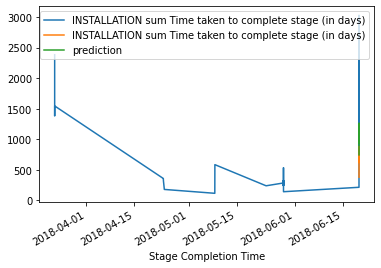

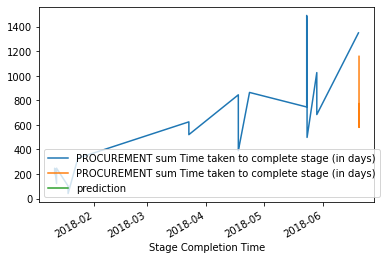

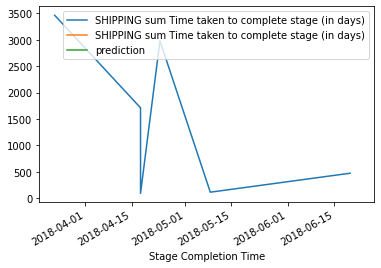

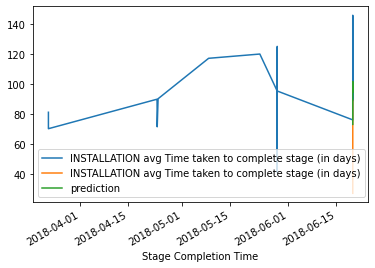

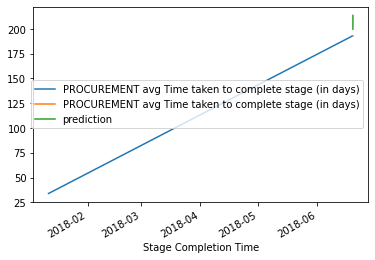

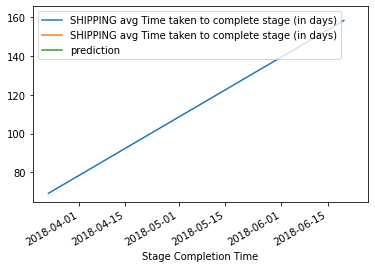

In [ ]:
for column in grouped_ts.columns:
  print("========================================")
  print(f"Auto arima for forecasting {column}")
  univariate_auto_arima(grouped_ts, column)
  print("========================================")

In [ ]:
!pip install kats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 612 kB 4.0 MB/s 
     |████████████████████████████████| 9.5 MB 25.8 MB/s 
     |████████████████████████████████| 64 kB 2.2 MB/s 
     |████████████████████████████████| 950 kB 49.5 MB/s 
     |████████████████████████████████| 361 kB 45.7 MB/s 
     |████████████████████████████████| 67.3 MB 86 kB/s 
     |████████████████████████████████| 347 kB 68.6 MB/s 
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
  Attempting uninstall: statsmodels
    Found existing installation: stat

In [ ]:
import pandas as pd

from kats.consts import TimeSeriesData
from kats.models.prophet import ProphetModel, ProphetParams

In [ ]:
def univariate_prophet(df: pd.DataFrame, column_name: str):
  stage_completition_col_name = "Stage Completion Time"
  train_split = 0.9
  test_split = 0.1

  base_df = df[df[column_name].notnull()][[column_name]].reset_index()

  train_idx = round(len(base_df) * train_split)
  train_df = base_df.iloc[:train_idx, :]
  test_df = base_df.iloc[train_idx:, :]

  train_ts = TimeSeriesData(train_df, time_col_name=stage_completition_col_name)

  # create a model param instance
  params = ProphetParams(growth='logistic',
                         seasonality_mode ='multiplicative',
                         cap=train_df[column_name].max())


  # create a prophet model instance
  m = ProphetModel(train_ts, params)

  m.fit()

  # make prediction for next len(test_df) datapoints
  predictions = m.predict(steps=len(test_df))

  test_df = test_df.assign(prediction=predictions['fcst'].values)
  test_df = test_df.assign(prediction_lower=predictions['fcst_lower'].values)
  test_df = test_df.assign(prediction_upper=predictions['fcst_upper'].values)

  for col in ['prediction', 'prediction_lower', 'prediction_upper']:
    test_df[col] = test_df[col].clip(lower=0.0)

  print("Test data with predictions")
  print(test_df)

In [ ]:
for column in grouped_ts.columns:
  print("========================================")
  print(f"Prophet for forecasting {column}")
  univariate_prophet(grouped_ts, column)
  print("========================================")

Prophet for forecasting INSTALLATION sum Time taken to complete stage (in days)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 22.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.


Test data with predictions
   Stage Completion Time  INSTALLATION sum Time taken to complete stage (in days)  prediction  prediction_lower  prediction_upper
29   2018-06-19 19:54:18                                         623.402338        516.559984          0.000000       1106.670191
30   2018-06-19 19:55:10                                         884.467662        950.926889        360.772481       1525.163340
31   2018-06-19 19:56:55                                         380.785903          0.000000          0.000000          0.000000
Prophet for forecasting PROCUREMENT sum Time taken to complete stage (in days)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.


Test data with predictions
   Stage Completion Time  PROCUREMENT sum Time taken to complete stage (in days)   prediction  prediction_lower  prediction_upper
24   2018-06-19 19:49:07                                        1159.259971       1309.344252       1077.770060       1550.719251
25   2018-06-19 19:50:26                                         579.632442        513.872802        285.795837        757.434122
26   2018-06-19 19:51:39                                         772.846134        222.213131          6.112338        464.058147
Prophet for forecasting SHIPPING sum Time taken to complete stage (in days)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 22.


Test data with predictions
  Stage Completion Time  SHIPPING sum Time taken to complete stage (in days)  prediction  prediction_lower  prediction_upper
6   2018-06-22 12:19:51                                         482.973125           0.0               0.0               0.0
Prophet for forecasting INSTALLATION avg Time taken to complete stage (in days)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.


Test data with predictions
   Stage Completion Time  INSTALLATION avg Time taken to complete stage (in days)  prediction  prediction_lower  prediction_upper
29   2018-06-19 19:54:18                                          89.057477        112.158706         87.259834        136.622142
30   2018-06-19 19:55:10                                          63.176262         83.786733         59.327386        107.173863
31   2018-06-19 19:56:55                                          27.198993         30.980572          7.259019         54.344915
Prophet for forecasting PROCUREMENT avg Time taken to complete stage (in days)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.


Test data with predictions
   Stage Completion Time  PROCUREMENT avg Time taken to complete stage (in days)  prediction  prediction_lower  prediction_upper
24   2018-06-19 19:49:07                                         193.209994       227.292021        226.781488        227.799910
25   2018-06-19 19:50:26                                         193.210816       139.216844        138.704127        139.731862
26   2018-06-19 19:51:39                                         193.211534       149.764571        149.272581        150.224767
Prophet for forecasting SHIPPING avg Time taken to complete stage (in days)
Test data with predictions
  Stage Completion Time  SHIPPING avg Time taken to complete stage (in days)  prediction  prediction_lower  prediction_upper
6   2018-06-22 12:19:51                                         160.991042    172.655009        172.655009        172.655009
